In [2]:
from scipy import stats
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import json
import os
import random

# India vs Japan Similarity Correlation

In [17]:
# shuffle one of the two arrays with n permutations
def permutations(a, b, statistic, n):
    p_values = []
    for i in range(n):
        c = random.sample(b, len(b))
        if(len(a)==len(c)):
            r, p = sp.pearsonr(a,c)
            if(r>statistic):
                p_values.append(p)
        else:
            print("Error! array lengths are not the same")
            return
    return p_values

In [19]:
def flatten_distance_matrix(numpy_array):
    arr = []
    for i in range(5):
        for j in range(5):
            if i<j:
                arr.append(numpy_array[i,j])
    return arr

In [21]:
PATH = './output/japan/similarity/'
japanese_pairwise = []
for i in range(6):
    npar = pd.read_csv(PATH+str(i)+'_average_distance.csv').to_numpy()
    x = flatten_distance_matrix(npar)
    japanese_pairwise.extend(x)
japanese_pairwise = [x/100 for x in japanese_pairwise]

In [15]:
PATH = './output/india/pairwise/'

indian_pairwise = []
for i in range(6):
    npar = pd.read_csv(PATH+'full_all.csv').to_numpy()
    x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
    indian_pairwise.extend(x)
indian_pairwise = [1- (x / 100) for x in indian_pairwise]

In [24]:
## Japan vs India Correlation
a = japanese_pairwise
b = indian_pairwise
n = 1000
r, p = sp.pearsonr(a,b)
statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
# Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)
print(r, sig, n)

0.8038960671468731 0.000999000999000999 1000


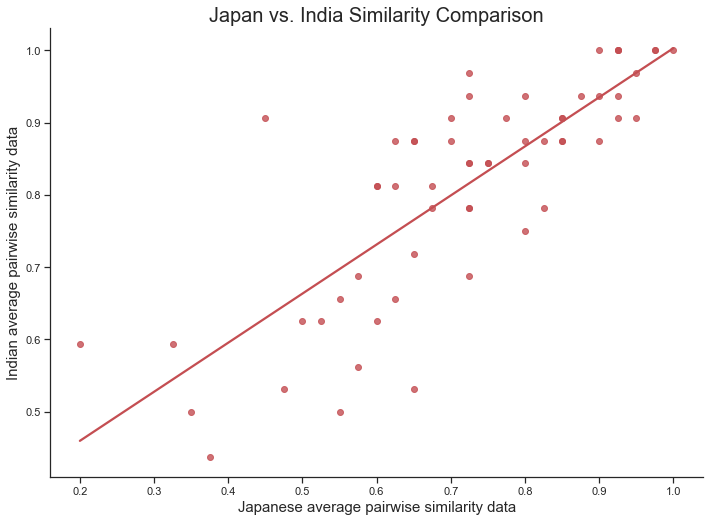

In [77]:
## Japan vs India Plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('ticks')
p = sns.regplot(x=japanese_pairwise, y=indian_pairwise, ci=None, color="r")
p.set_xlabel("Japanese average pairwise similarity data", fontsize = 15)
p.set_ylabel("Indian average pairwise similarity data", fontsize = 15)
p.set_title("Japan vs. India Similarity Comparison", fontsize = 20)
sns.despine()  

In [38]:
PATH = './output/india/pairwise/'

def correlation(category, label, title):
    a = []
    b = []
    for i in range(6):
        npar = pd.read_csv(PATH+'full_'+category[0]+'.csv').to_numpy()
        x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
        a.extend(x)
    a = [1- (x / 100) for x in a]
                           
    for i in range(6):
        npar = pd.read_csv(PATH+'full_'+category[1]+'.csv').to_numpy()
        x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
        b.extend(x)
    b = [1- (x / 100) for x in b]
    n = 1000
    r, p = sp.pearsonr(a,b)
    statistic = r
    results = permutations(list(a),list(b),statistic, n)
    Sum_p = sum(results)
    sig = (Sum_p+1)/(n+1)
    # Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)
    print(r, sig, n)
                           
    ## Japan vs India Plot
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_style('ticks')
    p = sns.regplot(x=a, y=b, ci=None, color="b")
    p.set_xlabel(label[0], fontsize = 15)
    p.set_ylabel(label[1], fontsize = 15)
    p.set_title(title, fontsize = 20)
    sns.despine()  

0.6629765121351706 0.000999000999000999 1000


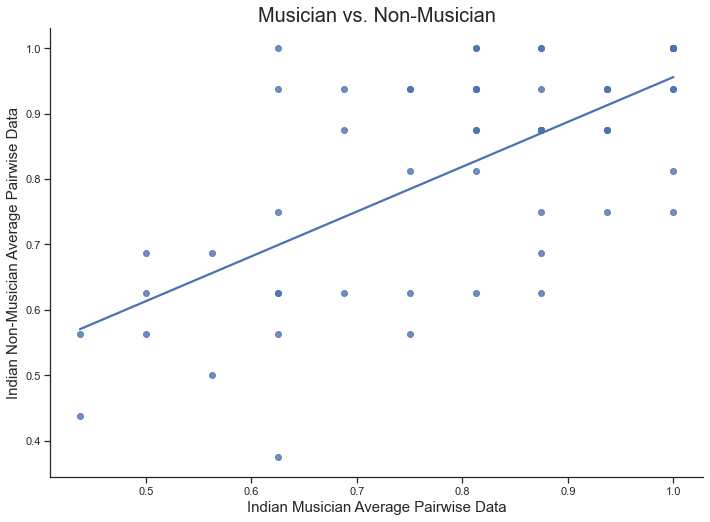

In [45]:
correlation(['musician', 'non'], 
            ['Indian Musician Average Pairwise Data','Indian Non-Musician Average Pairwise Data'],
            'Musician vs. Non-Musician'
           )

0.6324142685494185 0.000999000999000999 1000


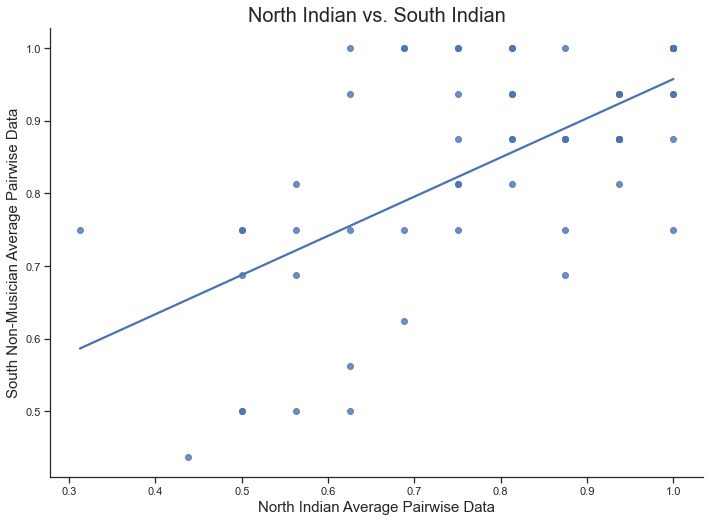

In [44]:
correlation(['north', 'south'], 
            ['North Indian Average Pairwise Data','South Non-Musician Average Pairwise Data'],
            'North Indian vs. South Indian'
           )

## Feature 

In [73]:
PATH = './output/japan/feature/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
for i in range(1, len(feature_names)+1):
    label = feature_names[i-1].lower().replace(' ', '_')
    npar = pd.read_csv(PATH+label+'_average.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened = flatten_distance_matrix(npar[j:j+5, j:j+5])
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, full_partial)
    print(round(r,2), round(p,2))

0.05 0.71
0.07 0.59
-0.05 0.72
0.04 0.78
0.08 0.55
0.14 0.29
0.11 0.39
0.15 0.26
0.19 0.16
0.02 0.89
0.24 0.07
0.07 0.61
-0.05 0.68


## Feature PCA

In [78]:
import plotly.express as px
from sklearn.decomposition import PCA

PATH = './output/india/bollywood/'
df = pd.read_csv(PATH+'full_all.csv')

pca = PCA(n_components=3)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [76]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

PATH = './output/india/feature/'
df = pd.read_csv(PATH+'full_all.csv')

pca = PCA(n_components=2)
components = pca.fit_transform(df)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1)

fig.show()

In [79]:
PATH = './output/india/bollywood/'
df = pd.read_csv(PATH+'full_all.csv')

pca = PCA(n_components=2)
components = pca.fit_transform(df)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1)

fig.show()

In [74]:
pd.DataFrame(loadings)

,0,1
0,-6.744960,-35.383291
1,10.850527,2.898645
2,20.203552,0.451457
3,11.787055,0.348859
4,19.417854,-1.631972
5,18.857791,-4.323617
6,2.729577,8.540970
7,-3.110389,-2.604532
8,9.164370,2.711705
9,13.414719,-3.425558
